## Statistical Inference (two populations)

In this demonstration, we'll understand how to draw statistical inferences with two samples drawn from different populations. 
We will be interested in:

- Determining whether the population means are different.
- Constructing confidence intervals for the difference in population means. 
---

## Demonstration Overview

- Problem Statement Discussion
- Data Preparation and Exploratory Data Analysis
- Hypothesis Testing for Difference in Means
    - Independent Samples
        - Equal variances
        - Unequal variances
    - Paired Samples
    
---

### Problem Statement

A restaurant chain is interested in knowing whether a new storefront look and employee uniforms can improve sales. For conducting this experiment, 2 restaurant stores are chosen with similar location and similar performance for the treatment and the control groups. Here's an overview

**Treatment Group**
- *Store Owner*: Andy
- *Changes made*: New Storefront look, employee uniforms

**Control Group**
- *Store Ower*: Bob
- *Changes made*: No changes

We use a 14 day testing period to estimate which storefront look does "*better*"

Now let's go ahead and analyze the dataset 

---

### Data Preparation and EDA

In [3]:
### Import the libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
##Import the dataset
df = pd.read_excel('TwoSample.xlsx')

In [11]:
df.head()

,Day,Andy,Bob
0,Tuesday,981,933
1,Friday,1932,1827
2,Tuesday,873,825
3,Thursday,1338,1281
4,Sunday,1349,1267


Let's prepare a few visualizations to analyze the data

<Axes: xlabel='Day'>

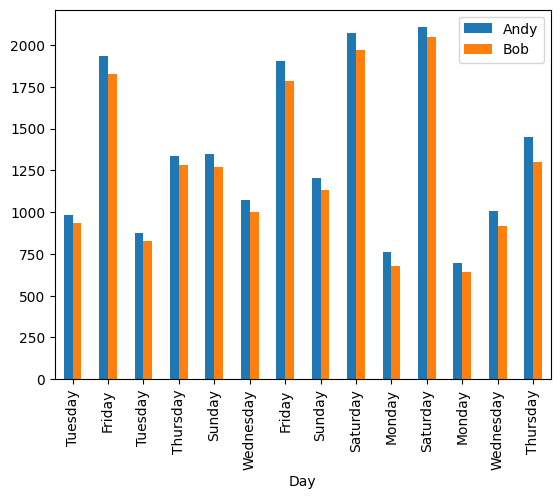

In [13]:
## We can observe the day wise trends for both Andy and Bob using a grouped bar chart
df.plot(kind='bar', x='Day')

###### **Observations**:


#### Next, let's compare the sales distributions for both the stores

In [15]:
## We shall use a boxplot for this
## You can directly pass the DataFrame as an argument and the sns.boxplot function would only consider the numeric columns
## Which in this case are the columns 'Andy' and 'Bob'

<Axes: >

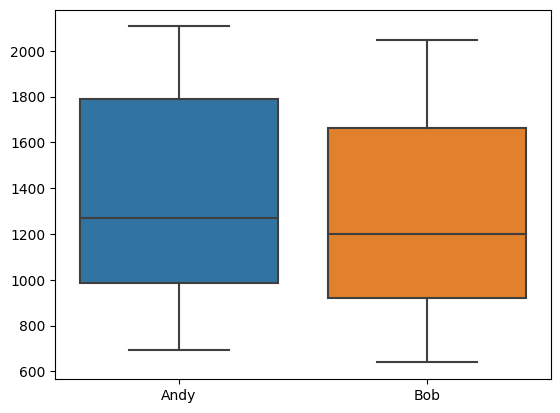

In [16]:
sns.boxplot(data=df)

We can see that the median sales in Andy's store is slightly better than Bob's 

In [20]:
#Mean difference calculation
df['Andy'].mean() - df['Bob'].mean()

81.21428571428578

Average sales for Andy are about $81 more

In [22]:
## We can also add a column that computes the pair-wise differences
df['difference'] = df['Andy'] - df['Bob']

In [27]:
df['difference']

0      48
1     105
2      48
3      57
4      82
5      75
6     123
7      71
8     102
9      81
10     57
11     54
12     87
13    147
Name: difference, dtype: int64

Let's obtain some more descriptive statistics for both the restaurants

In [29]:
pd.options.display.float_format = "{:,.2f}".format

In [35]:
#Obtain descriptive statistics
df.columns

Index(['Day', 'Andy', 'Bob', 'difference'], dtype='object')

<Axes: xlabel='Day', ylabel='difference'>

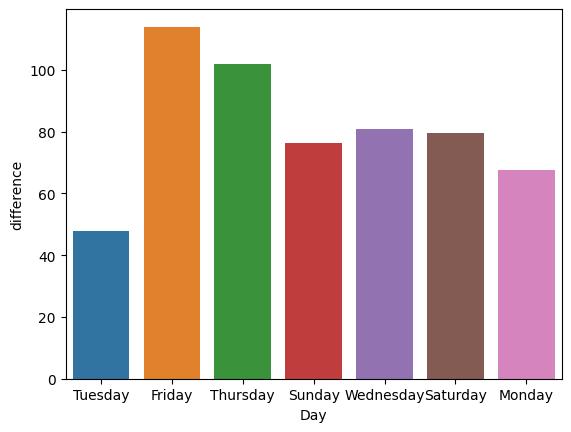

In [42]:
sns.barplot(data=df, x='Day', y='difference', errorbar=('ci', False,))

**Summary**:


###  Hypothesis Testing for Difference in Means

**Independent Samples**
- Equal variances

We shall start with conducting t-tests for difference in means using *scipy*. Assumes independent samples and equality of variance across populations. 

The hypotheses are as follows. 

> Let $\mu_1$ be the mean for Andy and $\mu_2$ the mean for Bob.

$$H_0: \mu_1-\mu_2 = 0$$
$$H_a: \mu_1-\mu_2 \neq 0$$

> This will be a two-sided test, with $\alpha$ = 0.05

In [57]:
## Run the t-test
st.ttest_ind(a=df['Andy'], b=df['Bob'], equal_var=True)

TtestResult(statistic=0.44523214069369493, pvalue=0.6598369595940106, df=26.0)

Next, we can run the test, without the equal variance assumption

In [58]:
##Run the test for the unequal variance assumption
st.ttest_ind(a=df['Andy'], b=df['Bob'], equal_var=False)

TtestResult(statistic=0.44523214069369493, pvalue=0.6598396576346228, df=25.980860679682216)

In [61]:
### Additional Code
### To test equality of variances
# Bartlett's test of equality of variances
st.bartlett(df['Andy'], df['Bob'])

BartlettResult(statistic=0.009225415343954173, pvalue=0.923481635617045)

---

**Paired Samples**

In [63]:
##Reiterating the need for using paired samples
## Plot a scatterplot between Andy's sales and Bob's sales

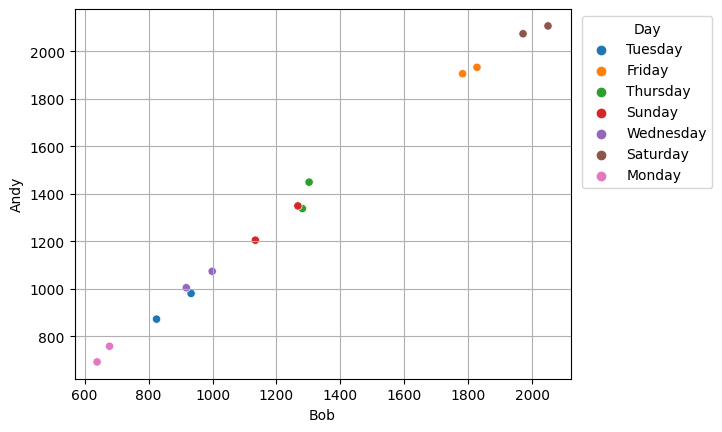

In [89]:
ax = sns.scatterplot(data=df, y='Andy', x='Bob', hue='Day')
ax.grid()
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3, 1))

**Observation**: There is a near linear relationship between Andy and Bobs sales for each day of the week.
They are highly correlated. This violates the indepence assumption.

##### Using one-sample t-test on the Difference column

We already have computed the "Difference" column. We can use it to perform hypothesis tests.

Our hypotheses changes *a little bit*

> Let $\mu_d$ denote the difference in means for sales in Andy's and Bob's restaurants 

> Our original hypotheses that was shown previously changes to 

$$H_0: \mu_d = 0$$
$$H_a: \mu_d \neq 0$$

> This will still be a two-sided test, with $\alpha$ = 0.05

In [92]:
## We can peform a one-sample t-test on the 'Difference' column
##Let's check the documentation for ttest_1amp
?st.ttest_1samp

Signature:
st.ttest_1samp(
    a,
    popmean,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the T-test for the mean of ONE group of scores.

This is a test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.

Parameters
----------
a : array_like
    Sample observation.
popmean : float or array_like
    Expected value in null hypothesis. If array_like, then its length along
    `axis` must equal 1, and it must otherwise be broadcastable with `a`.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaN

In [93]:
## Run the one-sample t-test
st.ttest_1samp(df['difference'], 0)

TtestResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07, df=13)

The P-value is nearly 0, indicating the null hypothesis can be rejected.
Thus, in paired sample case we can observe significant evidence to suggest that andy's restaurant can perform better than bob's restaurant.

#### Using two-sample t-test for paired samples

In [94]:
## A quick look at the ttest_rel method's documentation
?st.ttest_rel

Signature:
st.ttest_rel(
    a,
    b,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the t-test on TWO RELATED samples of scores, a and b.

This is a test for the null hypothesis that two related or
repeated samples have identical average (expected) values.

Parameters
----------
a, b : array_like
    The arrays must have the same shape.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: NaNs will b

In [95]:
# Paired sample t-test
st.ttest_rel(df['Andy'], df['Bob'])

TtestResult(statistic=10.275885788346828, pvalue=1.3108746661209956e-07, df=13)

Reject the null hypothesis. in two samples case we can observe significant evidence to suggest that andy's restaurant can perform better than bob's restaurant.

### Using paired t-test in Pingouin

*Pingouin* is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. It provides slightly more exhaustive statistical information by default as compared to the methods in the *scipy.stats* package

Read more: https://pingouin-stats.org/

In [96]:
##Install pingouin if it's not already there in the system
!pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     ---------------- ---------------------- 81.9/198.6 kB 2.2 MB/s eta 0:00:01
     ----------------------- -------------- 122.9/198.6 kB 2.4 MB/s eta 0:00:01
     ----------------------- -------------- 122.9/198.6 kB 2.4 MB/s eta 0:00:01
     ----------------------- -------------- 122.9/198.6 kB 2.4 MB/s eta 0:00:01
     ------------------------------------ 198.6/198.6 kB 801.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.7 MB/s eta 0:00:06
      --------------------------------------- 0.2/9.2 MB 2.3 MB/s eta 0:00:04
     - -------------------------------------- 0.4/9.2 MB 2.5 MB/s eta 0:00:04
     - -------------------------------------- 0.4/9.2 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 2.1 MB/s 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
##Import the library
import pingouin as pg

In [99]:
## Check the documentation for pg.ttest
?pg.ttest

Signature:
pg.ttest(
    x,
    y,
    paired=False,
    alternative='two-sided',
    correction='auto',
    r=0.707,
    confidence=0.95,
)
Docstring:
T-test.

Parameters
----------
x : array_like
    First set of observations.
y : array_like or float
    Second set of observations. If ``y`` is a single value, a one-sample
    T-test is computed against that value (= "mu" in the t.test R
    function).
paired : boolean
    Specify whether the two observations are related (i.e. repeated
    measures) or independent.
alternative : string
    Defines the alternative hypothesis, or tail of the test. Must be one of
    "two-sided" (default), "greater" or "less". Both "greater" and "less" return one-sided
    p-values. "greater" tests against the alternative hypothesis that the mean of ``x``
    is greater than the mean of ``y``.
correction : string or boolean
    For unpaired two sample T-tests, specify whether or not to correct for
    unequal variances using Welch separate variances T-te

Out inputes

In [100]:
## We can first conduct an unpaired test
## To verify the results we got in the independent samples case
pg.ttest(df['Andy'], df['Bob'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.45,26,two-sided,0.66,"[-293.73, 456.16]",0.17,0.381,0.07


In [103]:
## Now we can go ahead and conduct the paired test
## Here, paired will be set to True
pg.ttest(df['Andy'], df['Bob'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.28,13,two-sided,0.00,"[64.14, 98.29]",0.17,1.082e+05,0.09


We reject the null hypothesis of no difference in means. There is evidence of a difference in means.

In [105]:
!explorer.exe .